## DFO Nutrient Comparison

In [1]:
import sqlalchemy
from sqlalchemy import (create_engine, Column, String, Integer, Float, MetaData, 
                        Table, type_coerce, ForeignKey, case)
from sqlalchemy.orm import mapper, create_session, relationship, aliased, Session
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import case
import numpy as np
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
import sqlalchemy.types as types
from sqlalchemy.sql import and_, or_, not_, func
from sqlalchemy.sql import select
import os
from os.path import isfile
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import datetime
import glob
import gsw

%matplotlib inline

In [2]:
PATH= '/data/eolson/MEOPAR/SS36runs/CedarRuns/NewLOGnSiTB/'
start_date = datetime.datetime(2017,1,1)
end_date = datetime.datetime(2017,10,27)
flen=10
namfmt='long'
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','ammonium':'ptrc_T','diatoms':'ptrc_T','ciliates':'ptrc_T',
         'flagellates':'ptrc_T'}
fdict={'ptrc_T':1,'grid_T':1}
df1=et.loadDFO()
df1.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Z,dtUTC
0,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,12.0,NaN,None,5.28,mg/m^3,6.6,13.6,umol/L,NaN,NaN,12.0,1982-07-16 01:21:00
1,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,21.5,NaN,None,0.61,mg/m^3,21.2,45.0,umol/L,NaN,NaN,21.5,1982-07-16 01:21:00
2,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,30.5,NaN,None,NaN,mg/m^3,23.5,47.4,umol/L,NaN,NaN,30.5,1982-07-16 01:21:00
3,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,52.3,NaN,None,NaN,mg/m^3,28.0,50.2,umol/L,NaN,NaN,52.3,1982-07-16 01:21:00
4,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,75.4,NaN,None,NaN,mg/m^3,26.5,49.1,umol/L,NaN,NaN,75.4,1982-07-16 01:21:00


In [3]:
data=et.matchData(df1,filemap, fdict, start_date, end_date, namfmt, PATH, flen)

(Lat,Lon)= 50.4882 -126.3484  not matched to domain
(Lat,Lon)= 50.6318 -126.4979  not matched to domain
(Lat,Lon)= 50.8046 -126.5291  not matched to domain
(Lat,Lon)= 50.8762 -126.6183  not matched to domain
(Lat,Lon)= 50.9086 -126.5451  not matched to domain


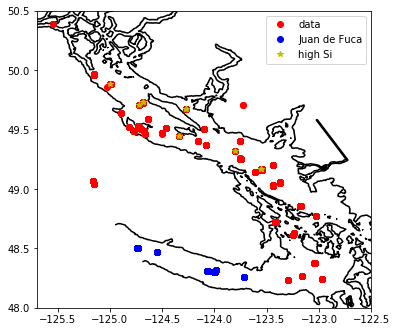

In [4]:
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords = 'map')
ax.plot(data['Lon'], data['Lat'], 'ro',label='data')
ax.plot(data.loc[(data.Lon < -123.5) & (data.Lat < 48.6),['Lon']], 
        data.loc[(data.Lon < -123.5) & (data.Lat < 48.6),['Lat']], 
        'bo', label = 'Juan de Fuca')

ax.plot(data.loc[data.Si>75,['Lon']],data.loc[data.Si>75,['Lat']],'*',color='y',label='high Si')
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48, 50.5)
ax.legend()
ax.set_xlim(-125.7, -122.5);

# Nitrate

In [5]:
N_s, modmean_s, obsmean_s, bias_s, RMSE_s, WSS_s = et.stats(data.loc[data.Z<15,['N']],data.loc[data.Z<15,['mod_nitrate']])
N_i, modmean_i, obsmean_i, bias_i, RMSE_i, WSS_i = et.stats(data.loc[(data.Z>=15)&(data.Z<22),['N']],data.loc[(data.Z>=15)&(data.Z<22),['mod_nitrate']])
N_d, modmean_d, obsmean_d, bias_d, RMSE_d, WSS_d = et.stats(data.loc[data.Z>=22,['N']],data.loc[data.Z>=22,['mod_nitrate']])
N, modmean, obsmean, bias, RMSE, WSS = et.stats(data.loc[:,['N']],data.loc[:,['mod_nitrate']])
print('Nitrate')
print('z<15 m:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N_s,bias_s,RMSE_s,WSS_s))
print('15 m<=z<22 m:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N_i,bias_i,RMSE_i,WSS_i))
print('z>=22 m:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N_d,bias_d,RMSE_d,WSS_d))
print('all:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N,bias,RMSE,WSS))

Nitrate
z<15 m:
  N: 508
  bias: -2.829348231087639
  RMSE: 5.553695523350881
  WSS: 0.8711726087643571
15 m<=z<22 m:
  N: 137
  bias: -2.4034925950878794
  RMSE: 4.194376009269069
  WSS: 0.8467645892891259
z>=22 m:
  N: 945
  bias: -0.9260925942476455
  RMSE: 2.665897177159146
  WSS: 0.9067865530091513
all:
  N: 1590
  bias: -1.661474772631184
  RMSE: 3.9489549474870826
  WSS: 0.9442119802865557


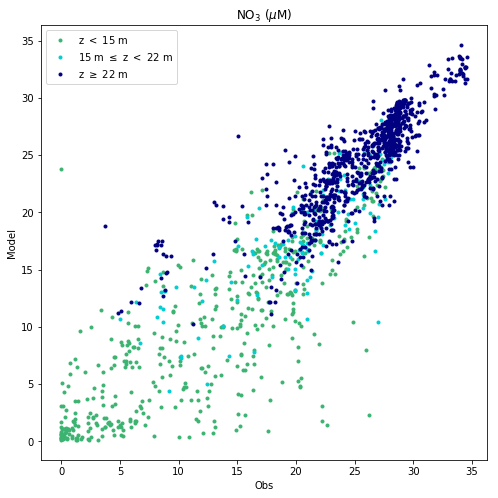

In [6]:
fig, ax = plt.subplots(figsize = (8,8))
ps=et.varvarPlot(ax,data,'N','mod_nitrate','Z',(15,22),'z','m',('mediumseagreen','darkturquoise','navy'))
ax.legend(handles=ps)
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('NO$_3$ ($\mu$M)')

Nitrate, z<15
Feb-Mar:
  N: 42
  bias: -2.6650564620608392
  RMSE: 3.748366909975236
  WSS: 0.8162290472238456
April:
  N: 185
  bias: -1.0816255909816626
  RMSE: 3.62240880803795
  WSS: 0.9025856179112739
May-Jun:
  N: 184
  bias: -3.4904536890805424
  RMSE: 6.009690411415372
  WSS: 0.8085713573042685
Sep-Oct:
  N: 97
  bias: -4.979714606840586
  RMSE: 7.868408338268716
  WSS: 0.7430925733601568


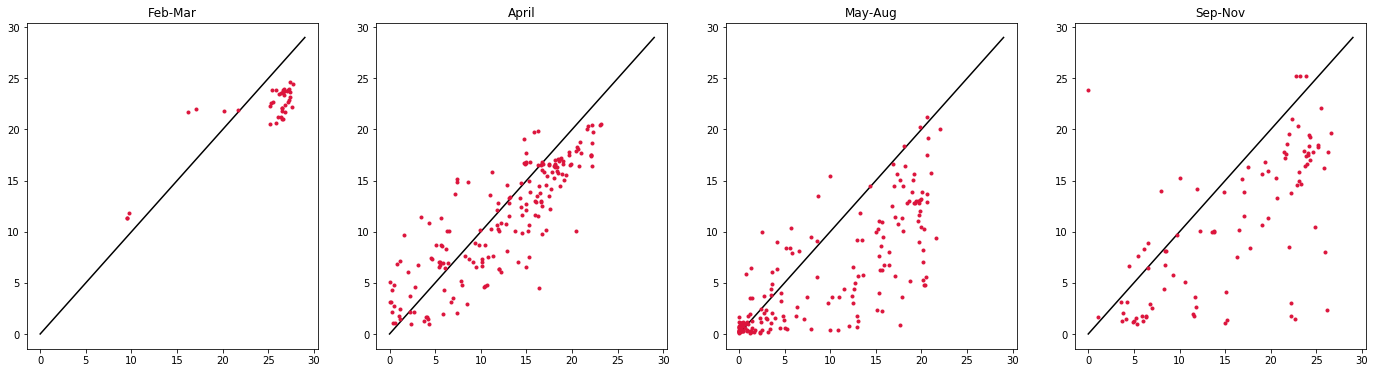

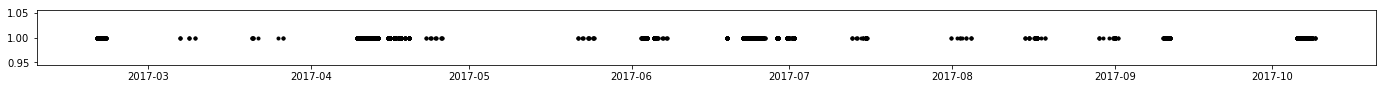

In [7]:
fig, ax = plt.subplots(1,4,figsize = (24,6))
for axi in ax:
    axi.plot(np.arange(0,30),np.arange(0,30),'k-')
ps=et.varvarPlot(ax[0],data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(2017,4,1)),:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[0].set_title('Feb-Mar')
ii1=(data.Z < 15)&(data.dtUTC<=dt.datetime(2017,5,1))&(data.dtUTC>dt.datetime(2017,4,1))
ps=et.varvarPlot(ax[1],data.loc[ii1,:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[1].set_title('April')
ii2=(data.Z < 15)&(data.dtUTC<=dt.datetime(2017,9,1))&(data.dtUTC>dt.datetime(2017,5,1))
ps=et.varvarPlot(ax[2],data.loc[ii2,:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[2].set_title('May-Aug')
ii3=(data.Z < 15)&(data.dtUTC<=dt.datetime(2017,12,1))&(data.dtUTC>dt.datetime(2017,9,1))
ps=et.varvarPlot(ax[3],data.loc[ii3,:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[3].set_title('Sep-Nov')

print('Nitrate, z<15')
print('Feb-Mar:')
et.printstats(data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(2017,4,1)),:],'N','mod_nitrate')
print('April:')
et.printstats(data.loc[ii1,:],'N','mod_nitrate')
print('May-Jun:')
et.printstats(data.loc[ii2,:],'N','mod_nitrate')
print('Sep-Oct:')
et.printstats(data.loc[ii3,:],'N','mod_nitrate')
fig,ax=plt.subplots(1,1,figsize=(24,1))
plt.plot(data.dtUTC,np.ones(np.shape(data.dtUTC)),'k.')

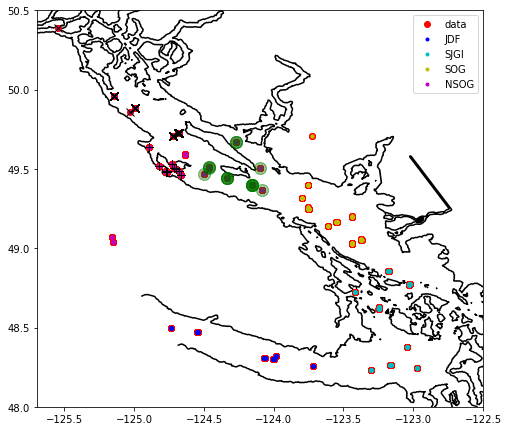

In [8]:
fig, ax = plt.subplots(figsize = (8,8))
viz_tools.set_aspect(ax, coords = 'map')
ax.plot(data['Lon'], data['Lat'], 'ro',label='data')
dJDF=data.loc[(data.Lon<-123.6)&(data.Lat<48.6)]
ax.plot(dJDF['Lon'],dJDF['Lat'],'b.',label='JDF')
dSJGI=data.loc[(data.Lon>=-123.6)&(data.Lat<48.9)]
ax.plot(dSJGI['Lon'],dSJGI['Lat'],'c.',label='SJGI')
dSOG=data.loc[(data.Lat>=48.9)&(data.Lon>-124.0)]
ax.plot(dSOG['Lon'],dSOG['Lat'],'y.',label='SOG')
dNSOG=data.loc[(data.Lat>=48.9)&(data.Lon<=-124.0)]
ax.plot(dNSOG['Lon'],dNSOG['Lat'],'m.',label='NSOG')
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48, 50.5)
ax.legend()
ax.set_xlim(-125.7, -122.5);
dNSOGN=data.loc[(data.Lat>=49.7)&(data.Lon<=-124.0)]
dNSOGS=data.loc[(data.Lat<49.7)&(data.Lat>=49.1)&(data.Lon<=-124.0)]
dNSOGW=data.loc[(data.Lat>=49.1)&(data.Lon<=-124.5)]
dNSOGE=data.loc[(data.Lat>=49.1)&(data.Lon>-124.5)&(data.Lon<=-124.0)]
dBaynes=data.loc[(data.Lat>=49.35)&(data.Lat<49.7)&(data.Lon<-124.65)&(data.Lon>-125.0)]

ax.plot(dNSOGE['Lon'],dNSOGE['Lat'],'go',ms=12,alpha=.03,label='NSOGE')
ax.plot(dNSOGN['Lon'],dNSOGN['Lat'],'kx',ms=8,label='NSOGE')
ax.plot(dBaynes['Lon'],dBaynes['Lat'],'k+',ms=8,label='Baynes')

(0, 35)

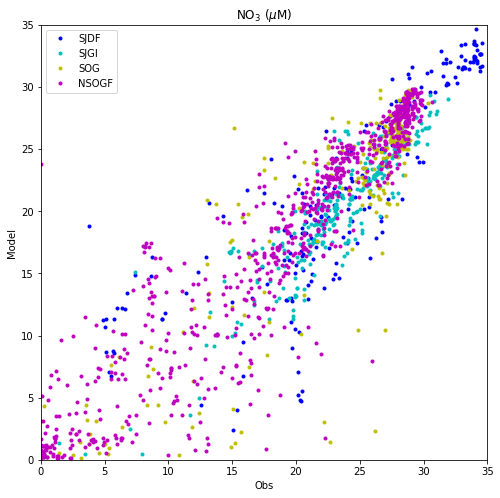

In [9]:
fig, ax = plt.subplots(figsize = (8,8))
ps1=et.varvarPlot(ax,dJDF,'N','mod_nitrate',cols=('b','darkturquoise','navy'),lname='SJDF')
ps2=et.varvarPlot(ax,dSJGI,'N','mod_nitrate',cols=('c','darkturquoise','navy'),lname='SJGI')
ps3=et.varvarPlot(ax,dSOG,'N','mod_nitrate',cols=('y','darkturquoise','navy'),lname='SOG')
ps4=et.varvarPlot(ax,dNSOG,'N','mod_nitrate',cols=('m','darkturquoise','navy'),lname='NSOGF')
ax.legend(handles=[ps1[0][0],ps2[0][0],ps3[0][0],ps4[0][0]])
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('NO$_3$ ($\mu$M)')
ax.set_xlim(0,35)
ax.set_ylim(0,35)

(-40, 20)

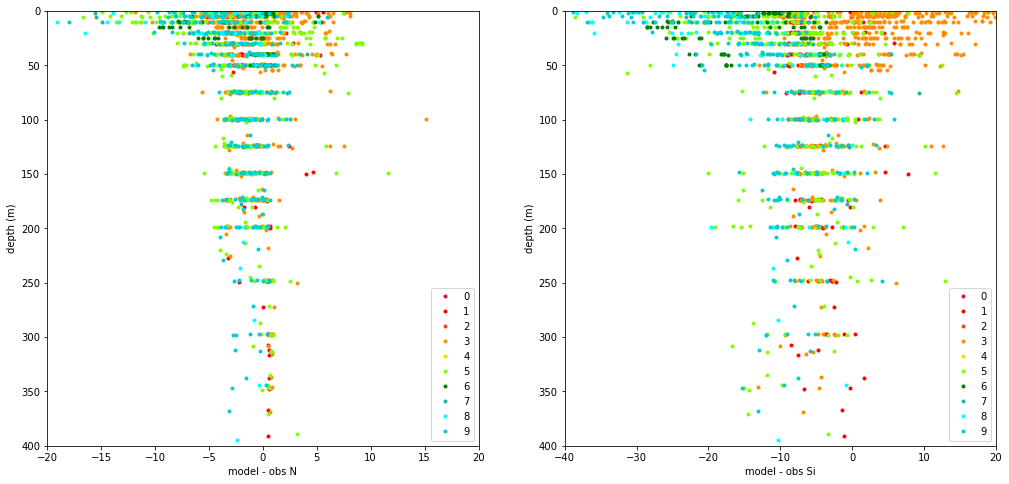

In [10]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)+1):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_nitrate']].values-data.loc[iii,['N']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_silicon']].values-data.loc[iii,['Si']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model - obs N')
ax[0].set_xlim(-20,20)
ax[1].set_xlabel('model - obs Si')
ax[1].set_xlim(-40,20)

In [26]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][:,:,:,:]
    gdept=mesh.variables['gdept_1d'][0,:]
    e3t0=mesh.variables['e3t_0'][0,:,:,:]
    e3t1d=mesh.variables['e3t_1d'][0,:]
    e1t=mesh.variables['e1t'][:,:]
    e2t=mesh.variables['e2t'][:,:]
bathy=np.sum(e3t0,0)
with nc.Dataset('/results/SalishSea/hindcast.201812/01jan16/SalishSea_1h_20160101_20160101_ptrc_T.nc') as ftemp:
        bounds=np.copy(ftemp.variables['deptht_bounds'][:,:])

0 0.5000002726327963 -11.184694713793302
1 1.5000031443492432 -9.075990571136474
2 2.5000115035531536 2.9363708917718188
3 3.500030550916236 6.203323249816895
4 4.500070415944791 -8.157344567833878
5 5.500150828149344 -8.566646178620202
6 6.500310215091616 0.7009237670898436
7 7.500623422387349 nan
8 8.501236225390784 18.07374221801758
9 9.502432540550814 -7.651174214609553
10 10.504765304051489 -10.618144484872689
11 11.509311270243131 -8.612020835876464
12 12.518166842463359 nan
13 13.535412118866162 nan
14 14.568982157803276 -5.290623960292086
15 15.634287368141315 -8.476794713338217
16 16.761173418470406 nan
17 18.00713455587004 21.720786743164062
18 19.48178513731196 -8.153512033426537
19 21.38997868353431 -6.659724523370915
20 24.10025665445164 -5.539741384468826
21 28.229915135962585 -6.565327712864552
22 34.68575798315476 -5.0572427520751955
23 44.51772486309295 -5.432843402033268
24 58.4843336842095 -3.431618919372559
25 76.58558444650436 -3.594182316916329
26 98.0629592415452

/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: Mean of empty slice
/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: Mean of empty slice


29 173.11448216959397 -5.433070229039046
30 199.57304923038515 -6.31272436497575
31 226.26030573521862 -4.705873611450195
32 253.06663732712263 -3.763552256266275
33 279.9345497590177 -7.147903900146482
34 306.8341973623137 -6.505624638875324
35 333.750169728144 -7.55252446492513
36 360.67453179815686 -9.490390141805014
37 387.60320347419827 -4.97505391438802
38 414.5340883529307 nan


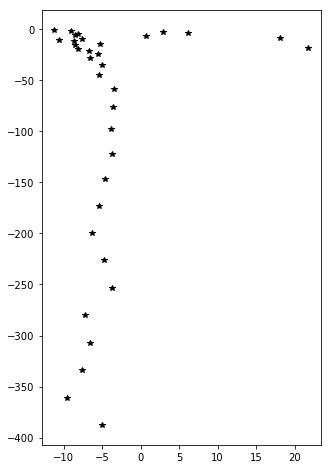

In [18]:
fig,ax=plt.subplots(1,1,figsize=(5,8))
rl=list()
for k in range(0,39):
    print(k,gdept[k],np.nanmean(data.loc[data.k==k,['mod_silicon']].values-data.loc[data.k==k,['Si']].values)/)
    ax.plot(np.nanmean(data.loc[data.k==k,['mod_silicon']].values-data.loc[data.k==k,['Si']].values),-1*gdept[k],'k*')
    rl.append(np.nanmean(data.loc[data.k==k,['mod_silicon']].values-data.loc[data.k==k,['Si']].values))
rl=np.array(rl)

In [21]:
for kk in range(0,25):
    print(kk,np.nanmean(rl[kk:]))

0 -4.13258460118221
1 -3.91888429473945
2 -3.7577247236020437
3 -3.97366329183991
4 -4.312896176561805
5 -4.1803289906558705
6 -4.02367480537143
7 -4.198659937684811
8 -4.198659937684811
9 -5.05529078982721
10 -4.951455452835916
11 -4.715343409834383
12 -4.545922652180381
13 -4.545922652180381
14 -4.545922652180381
15 -4.512072592720757
16 -4.323276301262783
17 -4.323276301262783
18 -5.625479453484125
19 -5.492425107171368
20 -5.427575139604725
21 -5.420977125200956
22 -5.34945521347198
23 -5.368936044231767
24 -5.36437123296023


0 0.5000002726327963 -15.476423661368234
1 1.5000031443492432 -10.114241468584215
2 2.5000115035531536 -10.511560020446778
3 3.500030550916236 nan
4 4.500070415944791 -12.45326668624878
5 5.500150828149344 -14.767381575107574
6 6.500310215091616 nan
7 7.500623422387349 nan
8 8.501236225390784 nan
9 9.502432540550814 -14.827733174076785
10 10.504765304051489 -13.961679338154038
11 11.509311270243131 -14.136775741577146
12 12.518166842463359 nan
13 13.535412118866162 nan
14 14.568982157803276 -19.357073819087102
15 15.634287368141315 -24.612751235961916
16 16.761173418470406 nan
17 18.00713455587004 nan
18 19.48178513731196 -9.146022807529993
19 21.38997868353431 -5.433187194824219
20 24.10025665445164 -20.509323065621512
21 28.229915135962585 -8.486045731937185


/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: Mean of empty slice
/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: Mean of empty slice


22 34.68575798315476 nan
23 44.51772486309295 -7.764085449674236
24 58.4843336842095 -12.796188449859619
25 76.58558444650436 -2.279893006544847
26 98.06295924154529 -2.8465481994628914
27 121.86651840226745 -3.645540526016899
28 147.08945807358322 -4.205983206431071
29 173.11448216959397 -6.0122853409616575
30 199.57304923038515 -6.8123524390326615
31 226.26030573521862 -4.363914222717284
32 253.06663732712263 -1.5033556556701662
33 279.9345497590177 -8.847616271972655
34 306.8341973623137 -7.293456916809083
35 333.750169728144 -12.18553792317708
36 360.67453179815686 -14.410681762695312
37 387.60320347419827 -3.4004733276367176
38 414.5340883529307 nan


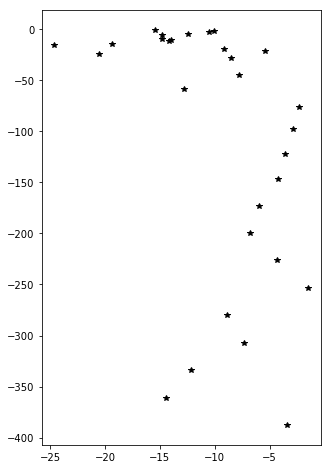

In [23]:
# repeat for May only:
fig,ax=plt.subplots(1,1,figsize=(5,8))
rl=list()
for k in range(0,39):
    ii=(data.k==k)&(data.Month==6)
    print(k,gdept[k],np.nanmean(data.loc[ii,['mod_silicon']].values-data.loc[ii,['Si']].values))
    ax.plot(np.nanmean(data.loc[ii,['mod_silicon']].values-data.loc[ii,['Si']].values),-1*gdept[k],'k*')
    rl.append(np.nanmean(data.loc[ii,['mod_silicon']].values-data.loc[ii,['Si']].values))
rl=np.array(rl)

In [24]:
for kk in range(0,25):
    print(kk,np.nanmean(rl[kk:]))

0 -10.074530283420264
1 -9.881605519922122
2 -9.872989373675379
3 -9.84842896418417
4 -9.84842896418417
5 -9.744235455301586
6 -9.53493770030967
7 -9.53493770030967
8 -9.53493770030967
9 -9.53493770030967
10 -9.304816157971969
11 -9.093140558872784
12 -8.85296745493448
13 -8.85296745493448
14 -8.85296745493448
15 -8.32776213672685
16 -7.470657447293425
17 -7.470657447293426
18 -7.470657447293426
19 -7.3775815939469505
20 -7.491957735071816
21 -6.67837240191246
22 -6.557860846577478
23 -6.557860846577478
24 -6.471701946356281


In [25]:
#try  10 microMolar concentration change in 5 months, converted to per second:
# 10 uM/5month*(1month/30days)*(1day/24hrs)*(1hr/3600s)
10/(5*30*24*3600)

7.716049382716049e-07

In [27]:
# concentration change is mmol/m3; multiply by depth to get equivalent flux: mmol/m2

0 0.5000002726327963 -15.476441529749387
1 1.5000031443492432 -10.114292187776135
2 2.5000115035531536 -10.511691762145714
3 3.500030550916236 nan
4 4.500070415944791 -12.45396032194103
5 5.500150828149344 -14.769024485391538
6 6.500310215091616 nan
7 7.500623422387349 nan
8 8.501236225390784 nan
9 9.502432540550814 -14.85205250767338
10 10.504765304051489 -14.006316233157618
11 11.509311270243131 -14.224835682028065
12 12.518166842463359 nan
13 13.535412118866162 nan
14 14.568982157803276 -20.24702514696927
15 15.634287368141315 -26.813146127463
16 16.761173418470406 nan
17 18.00713455587004 nan
18 19.48178513731196 -15.057717520882068
19 21.38997868353431 -12.115479607076066
20 24.10025665445164 -67.52665221467429
21 28.229915135962585 -43.44842755600668
22 34.68575798315476 nan
23 44.51772486309295 -91.8126179613542
24 58.4843336842095 -206.11998546016702
25 76.58558444650436 -45.503706426096095
26 98.06295924154529 -64.93896606714658
27 121.86651840226745 -89.82878700976674
28 147.

/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: Mean of empty slice
/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: Mean of empty slice


 -116.77683190098537
32 253.06663732712263 -40.35580416023851
33 279.9345497590177 -237.88800100358273
34 306.8341973623137 -196.26396497216354
35 333.750169728144 -328.0479013998406
36 360.67453179815686 -388.0362621485154
37 387.60320347419827 -91.57481656413901
38 414.5340883529307 nan


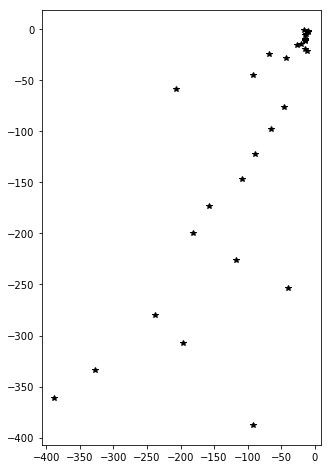

In [29]:
#May only, flux:
fig,ax=plt.subplots(1,1,figsize=(5,8))
rl=list()
for k in range(0,39):
    ii=(data.k==k)&(data.Month==6)
    print(k,gdept[k],np.nanmean(data.loc[ii,['mod_silicon']].values-data.loc[ii,['Si']].values)*e3t1d[k])
    ax.plot(np.nanmean(data.loc[ii,['mod_silicon']].values-data.loc[ii,['Si']].values)*e3t1d[k],-1*gdept[k],'k*')
    rl.append(np.nanmean(data.loc[ii,['mod_silicon']].values-data.loc[ii,['Si']].values)*e3t1d[k])
rl=np.array(rl)

In [30]:
for kk in range(0,25):
    print(kk,np.nanmean(rl[kk:]))

0 -90.90022636029089
1 -93.59393296138164
2 -96.68577150855224
3 -100.0001591911063
4 -100.00015919110632
5 -103.50200714587292
6 -107.19921475672633
7 -107.19921475672633
8 -107.19921475672633
9 -107.19921475672633
10 -111.21430876755473
11 -115.63285388275459
12 -120.46180713040823
13 -120.4618071304082
14 -120.4618071304082
15 -125.47254622958016
16 -130.66514623495476
17 -130.66514623495476
18 -130.66514623495476
19 -137.08778116351434
20 -144.4390930197754
21 -149.24612057009423
22 -156.29930010436675
23 -156.29930010436675
24 -160.9054916860105


In [36]:
# change in 5 months, converted to per second:
# 150 mmol/m2/5 months * (1month/30days) *( 1 day/24 hrs) * (1 hr/3600 s)
150/(5*30*24*3600) #mmol/m2/s

1.1574074074074073e-05

In [38]:
# based on:
# http://localhost:8883/notebooks/plotResults/fullDomain398x898/bioRateAnalysis/SiBalance/checkBottomFlux.ipynb
# the loss of Si through the bottom in a previous run was 
# bottom flux bsi = conc * w * A *1e-3
# mmol/m3*m/s*m2=mmol/s*24*3600s/d*1e-3=mol/s summed over a month of days
# mol/s
# bottom flux out ~3500 Mmol/(30 days)
# 
A_SS=np.sum(np.sum(tmask[0,0,:,:]*e1t*e2t))
3500*1e6/(30*24*3600)/A_SS*1e3 # mmol/m2/s

7.408496733399027e-05

In [33]:
A_SS

18226486297.656574

# Silicate

In [11]:
print('Nitrate')
print('z<15 m:')
et.printstats(data.loc[data.Z<15,:],'Si','mod_silicon')
print('15 m<=z<22 m:')
et.printstats(data.loc[(data.Z>=15)&(data.Z<22),:],'Si','mod_silicon')
print('z>=22 m:')
et.printstats(data.loc[data.Z>=22,:],'Si','mod_silicon')
print('all:')
et.printstats(data,'Si','mod_silicon')
print('obs Si < 50:')
et.printstats(data.loc[data.Si<50,:],'Si','mod_silicon')

Nitrate
z<15 m:
  N: 517
  bias: -8.143882262453126
  RMSE: 15.462206988663853
  WSS: 0.6490492367122614
15 m<=z<22 m:
  N: 140
  bias: -7.896589480808807
  RMSE: 12.258133324932501
  WSS: 0.6588080044759729
z>=22 m:
  N: 958
  bias: -5.20598018327685
  RMSE: 8.4031934560221
  WSS: 0.8144612139144305
all:
  N: 1615
  bias: -6.379714348347193
  RMSE: 11.46508558965251
  WSS: 0.824487650817143
obs Si < 50:
  N: 1060
  bias: -5.3189410911056285
  RMSE: 11.909678746217061
  WSS: 0.7033451696715679


(0, 80)

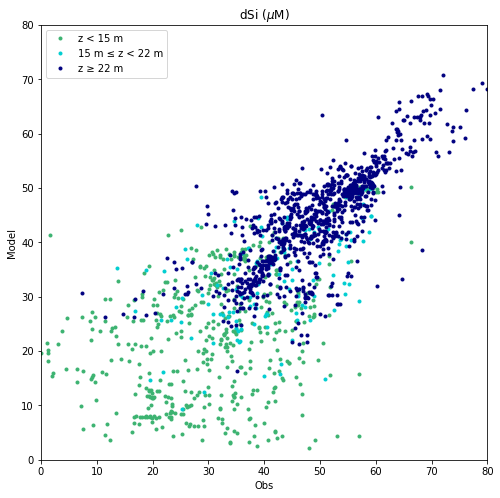

In [12]:
fig, ax = plt.subplots(figsize = (8,8))
ps=et.varvarPlot(ax,data,'Si','mod_silicon','Z',(15,22),'z','m',('mediumseagreen','darkturquoise','navy'))
ax.legend(handles=ps)
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('dSi ($\mu$M)')
ax.set_xlim(0,80)
ax.set_ylim(0,80)

Silicate, z<15
Feb-Mar:
  N: 42
  bias: -6.7777235412597605
  RMSE: 7.821860948644795
  WSS: 0.8267804060883641
April:
  N: 188
  bias: 4.335829859794455
  RMSE: 8.385275102205172
  WSS: 0.789262085323858
May-Jun:
  N: 187
  bias: -12.95095476956291
  RMSE: 14.894054726553989
  WSS: 0.5843982587884117
Sep-Oct:
  N: 100
  bias: -23.190302126884465
  RMSE: 25.7552124539219
  WSS: 0.3623727791134548


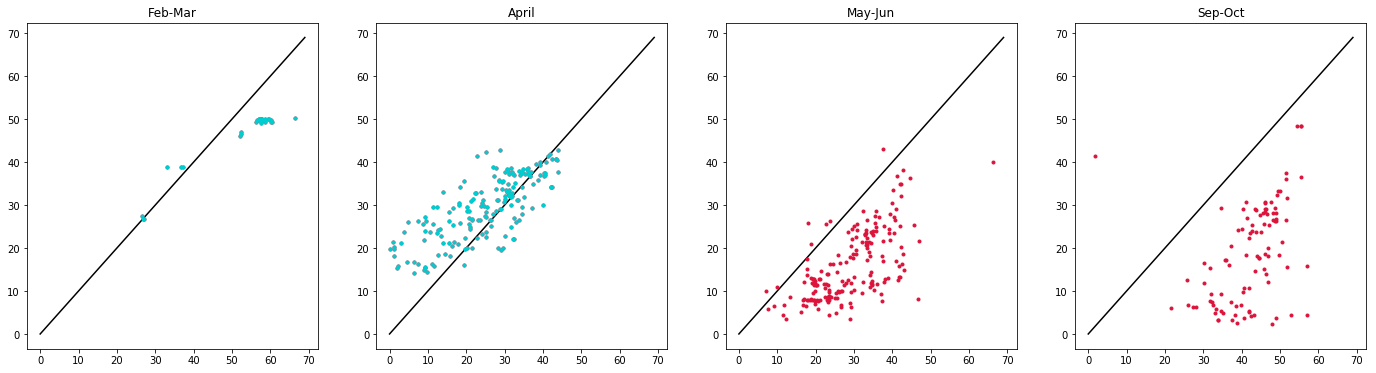

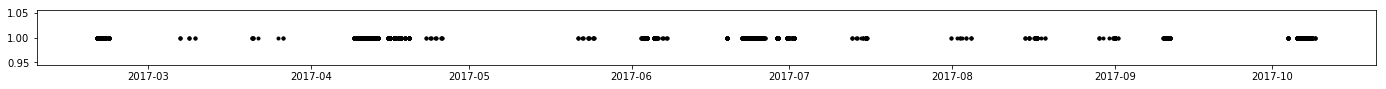

In [13]:
obsvar='Si'; modvar='mod_silicon'
fig, ax = plt.subplots(1,4,figsize = (24,6))
for axi in ax:
    axi.plot(np.arange(0,70),np.arange(0,70),'k-')
ps=et.varvarPlot(ax[0],data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(2017,4,1)),:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[0].set_title('Feb-Mar')
ii1=(data.Z < 15)&(data.dtUTC<=dt.datetime(2017,5,1))&(data.dtUTC>dt.datetime(2017,4,1))
ps=et.varvarPlot(ax[1],data.loc[ii1,:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[1].set_title('April')
ii2=(data.Z < 15)&(data.dtUTC<=dt.datetime(2017,9,1))&(data.dtUTC>dt.datetime(2017,5,1))
ps=et.varvarPlot(ax[2],data.loc[ii2,:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[2].set_title('May-Jun')
ii3=(data.Z < 15)&(data.dtUTC<=dt.datetime(2017,12,1))&(data.dtUTC>dt.datetime(2017,9,1))
ps=et.varvarPlot(ax[3],data.loc[ii3,:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[3].set_title('Sep-Oct')

ii4=(data.Z < 15)&(data.dtUTC<=dt.datetime(2017,4,1))&(data.dtUTC>dt.datetime(2017,2,1))
ps=et.varvarPlot(ax[0],data.loc[ii4,:],obsvar,modvar,cols=('darkturquoise','navy'))
ii5=(data.Z < 15)&(data.dtUTC<=dt.datetime(2017,5,1))&(data.dtUTC>dt.datetime(2017,4,1))
ps=et.varvarPlot(ax[1],data.loc[ii5,:],obsvar,modvar,cols=('darkturquoise','navy'))


print('Silicate, z<15')
print('Feb-Mar:')
et.printstats(data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(2017,4,1)),:],obsvar,modvar)
print('April:')
et.printstats(data.loc[ii1,:],obsvar,modvar)
print('May-Jun:')
et.printstats(data.loc[ii2,:],obsvar,modvar)
print('Sep-Oct:')
et.printstats(data.loc[ii3,:],obsvar,modvar)
fig,ax=plt.subplots(1,1,figsize=(24,1))
plt.plot(data.dtUTC,np.ones(np.shape(data.dtUTC)),'k.')

(0, 80)

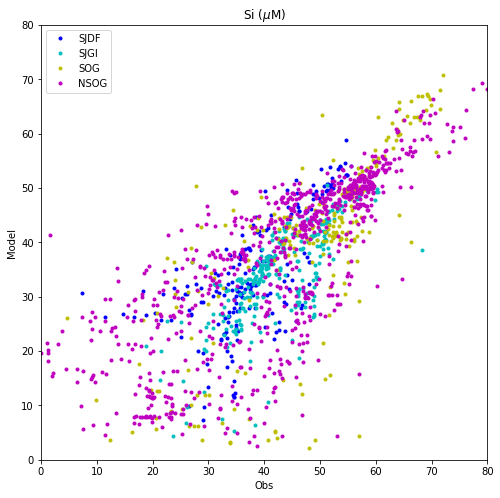

In [14]:
fig, ax = plt.subplots(figsize = (8,8))
ps1=et.varvarPlot(ax,dJDF,obsvar,modvar,cols=('b','darkturquoise','navy'),lname='SJDF')
ps2=et.varvarPlot(ax,dSJGI,obsvar,modvar,cols=('c','darkturquoise','navy'),lname='SJGI')
ps3=et.varvarPlot(ax,dSOG,obsvar,modvar,cols=('y','darkturquoise','navy'),lname='SOG')
ps4=et.varvarPlot(ax,dNSOG,obsvar,modvar,cols=('m','darkturquoise','navy'),lname='NSOG')
ax.legend(handles=[ps1[0][0],ps2[0][0],ps3[0][0],ps4[0][0]])
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('Si ($\mu$M)')
ax.set_xlim(0,80)
ax.set_ylim(0,80)

# Ratios

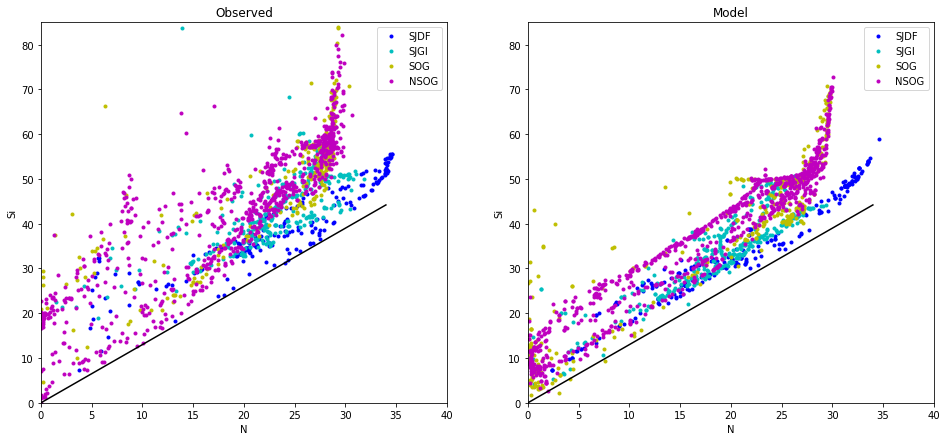

In [15]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
p1=ax[0].plot(dJDF['N'],dJDF['Si'],'b.',label='SJDF')
p2=ax[0].plot(dSJGI['N'],dSJGI['Si'],'c.',label='SJGI')
p3=ax[0].plot(dSOG['N'],dSOG['Si'],'y.',label='SOG')
p4=ax[0].plot(dNSOG['N'],dNSOG['Si'],'m.',label='NSOG')
ax[0].set_title('Observed')
ax[0].set_xlabel('N')
ax[0].set_ylabel('Si')
ax[0].set_xlim(0,40)
ax[0].set_ylim(0,85)
ax[0].legend()

p5=ax[1].plot(dJDF['mod_nitrate'],dJDF['mod_silicon'],'b.',label='SJDF')
p6=ax[1].plot(dSJGI['mod_nitrate'],dSJGI['mod_silicon'],'c.',label='SJGI')
p7=ax[1].plot(dSOG['mod_nitrate'],dSOG['mod_silicon'],'y.',label='SOG')
p8=ax[1].plot(dNSOG['mod_nitrate'],dNSOG['mod_silicon'],'m.',label='NSOG')
ax[1].set_title('Model')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Si')
ax[1].set_xlim(0,40)
ax[1].set_ylim(0,85)
ax[1].legend()
ax[0].plot(np.arange(0,35),1.3*np.arange(0,35),'k-')
ax[1].plot(np.arange(0,35),1.3*np.arange(0,35),'k-')

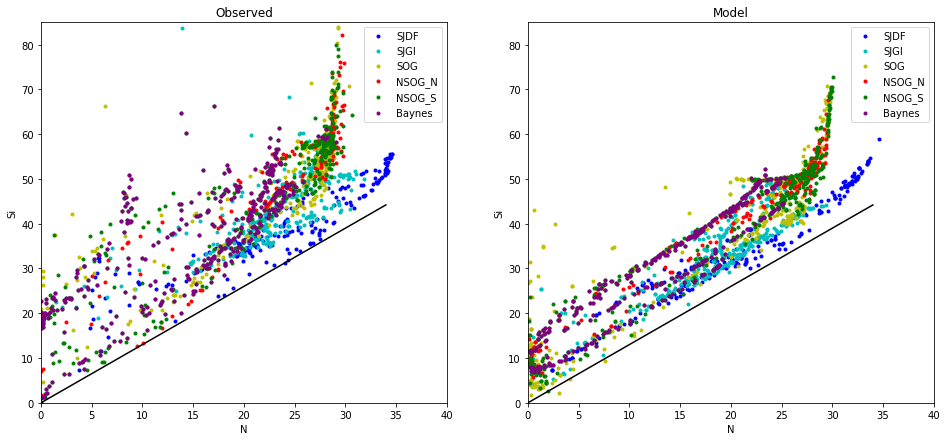

In [16]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
p1=ax[0].plot(dJDF['N'],dJDF['Si'],'b.',label='SJDF')
p2=ax[0].plot(dSJGI['N'],dSJGI['Si'],'c.',label='SJGI')
p3=ax[0].plot(dSOG['N'],dSOG['Si'],'y.',label='SOG')
p4=ax[0].plot(dNSOGN['N'],dNSOGN['Si'],'r.',label='NSOG_N')
p4=ax[0].plot(dNSOGS['N'],dNSOGS['Si'],'g.',label='NSOG_S')
p4=ax[0].plot(dBaynes['N'],dBaynes['Si'],'.',color='purple',label='Baynes')
ax[0].set_title('Observed')
ax[0].set_xlabel('N')
ax[0].set_ylabel('Si')
ax[0].set_xlim(0,40)
ax[0].set_ylim(0,85)
ax[0].legend()

p5=ax[1].plot(dJDF['mod_nitrate'],dJDF['mod_silicon'],'b.',label='SJDF')
p6=ax[1].plot(dSJGI['mod_nitrate'],dSJGI['mod_silicon'],'c.',label='SJGI')
p7=ax[1].plot(dSOG['mod_nitrate'],dSOG['mod_silicon'],'y.',label='SOG')
p8=ax[1].plot(dNSOGN['mod_nitrate'],dNSOGN['mod_silicon'],'r.',label='NSOG_N')
p8=ax[1].plot(dNSOGS['mod_nitrate'],dNSOGS['mod_silicon'],'g.',label='NSOG_S')
p8=ax[1].plot(dBaynes['mod_nitrate'],dBaynes['mod_silicon'],'.',color='purple',label='Baynes')
ax[1].set_title('Model')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Si')
ax[1].set_xlim(0,40)
ax[1].set_ylim(0,85)
ax[1].legend()
ax[0].plot(np.arange(0,35),1.3*np.arange(0,35),'k-')
ax[1].plot(np.arange(0,35),1.3*np.arange(0,35),'k-')

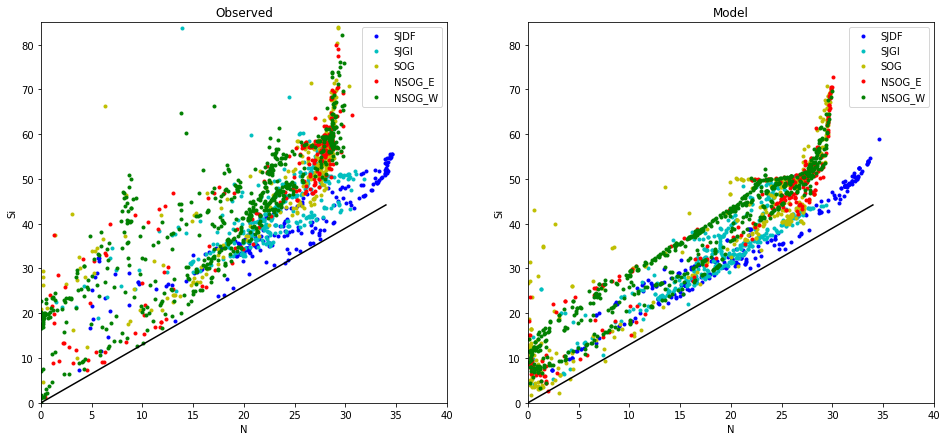

In [17]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
p1=ax[0].plot(dJDF['N'],dJDF['Si'],'b.',label='SJDF')
p2=ax[0].plot(dSJGI['N'],dSJGI['Si'],'c.',label='SJGI')
p3=ax[0].plot(dSOG['N'],dSOG['Si'],'y.',label='SOG')
p4=ax[0].plot(dNSOGE['N'],dNSOGE['Si'],'r.',label='NSOG_E')
p4=ax[0].plot(dNSOGW['N'],dNSOGW['Si'],'g.',label='NSOG_W')
ax[0].set_title('Observed')
ax[0].set_xlabel('N')
ax[0].set_ylabel('Si')
ax[0].set_xlim(0,40)
ax[0].set_ylim(0,85)
ax[0].legend()

p5=ax[1].plot(dJDF['mod_nitrate'],dJDF['mod_silicon'],'b.',label='SJDF')
p6=ax[1].plot(dSJGI['mod_nitrate'],dSJGI['mod_silicon'],'c.',label='SJGI')
p7=ax[1].plot(dSOG['mod_nitrate'],dSOG['mod_silicon'],'y.',label='SOG')
p8=ax[1].plot(dNSOGE['mod_nitrate'],dNSOGE['mod_silicon'],'r.',label='NSOG_E')
p8=ax[1].plot(dNSOGW['mod_nitrate'],dNSOGW['mod_silicon'],'g.',label='NSOG_W')
ax[1].set_title('Model')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Si')
ax[1].set_xlim(0,40)
ax[1].set_ylim(0,85)
ax[1].legend()
ax[0].plot(np.arange(0,35),1.3*np.arange(0,35),'k-')
ax[1].plot(np.arange(0,35),1.3*np.arange(0,35),'k-')

In [18]:
data.loc[data.Si>65,['Month','Lat','Lon','Z','Si']]

,Month,Lat,Lon,Z,Si
80,2.0,49.027667,-123.437833,297.5,66.85
81,2.0,49.027667,-123.437833,311.8,67.82
97,2.0,49.163167,-123.551000,347.1,66.29
98,2.0,49.163167,-123.551000,367.2,68.34
109,2.0,49.250833,-123.749000,390.9,72.03
140,2.0,49.402000,-124.155167,272.6,65.08
153,2.0,49.466500,-124.499500,316.1,69.51
169,2.0,49.730000,-124.685000,347.9,68.70
184,2.0,49.885333,-124.995333,307.2,66.13
185,2.0,49.483667,-124.766667,0.6,66.38


# Chlorophyll

In [19]:
data['l10_obsChl']=np.log10(data['Chlorophyll_Extracted']+0.01)
data['l10_modChl']=np.log10(2*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])+0.01)
data['mod_Chl']=2*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])

In [20]:
print('log10[Chl+0.01]')
print('z<15 m:')
et.printstats(data.loc[data.Z<15,:],'l10_obsChl','l10_modChl')
print('z>=15 m:')
et.printstats(data.loc[data.Z>=15,:],'l10_obsChl','l10_modChl')
print('all:')
et.printstats(data,'l10_obsChl','l10_modChl')
print('\n')
print('Chl')
print('z<15 m:')
et.printstats(data.loc[data.Z<15,:],'Chlorophyll_Extracted','mod_Chl')
print('z>=15 m:')
et.printstats(data.loc[data.Z>=15,:],'Chlorophyll_Extracted','mod_Chl')
print('all:')
et.printstats(data,'Chlorophyll_Extracted','mod_Chl')


log10[Chl+0.01]
z<15 m:
  N: 317
  bias: -0.004746083094406828
  RMSE: 0.512273892433951
  WSS: 0.5640609659103093
z>=15 m:
  N: 122
  bias: 0.07165999789958154
  RMSE: 0.48324807598855735
  WSS: 0.5607164082851518
all:
  N: 439
  bias: 0.016487497500733472
  RMSE: 0.5043751207672472
  WSS: 0.6438902256335675


Chl
z<15 m:
  N: 317
  bias: -0.9544864332960636
  RMSE: 5.4783940678276375
  WSS: 0.48184833619515943
z>=15 m:
  N: 122
  bias: -0.11649570231301243
  RMSE: 1.638480983079472
  WSS: 0.5490754126343577
all:
  N: 439
  bias: -0.7216051823167198
  RMSE: 4.734784220049116
  WSS: 0.5235377861790134


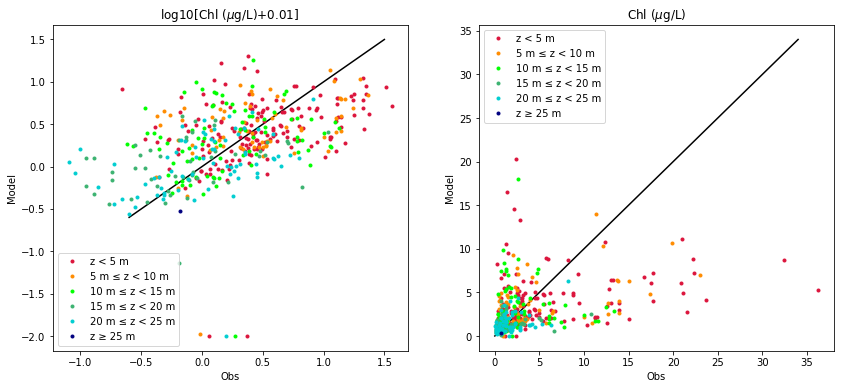

In [21]:
fig, ax = plt.subplots(1,2,figsize = (14,6))
ax[0].plot(np.arange(-.6,1.6,.1),np.arange(-.6,1.6,.1),'k-')
ps=et.varvarPlot(ax[0],data,'l10_obsChl','l10_modChl','Z',(5,10,15,20,25),'z','m',('crimson','darkorange','lime','mediumseagreen','darkturquoise','navy'))
ax[0].legend(handles=ps)
ax[0].set_xlabel('Obs')
ax[0].set_ylabel('Model')
ax[0].set_title('log10[Chl ($\mu$g/L)+0.01]')
ax[1].plot(np.arange(0,35),np.arange(0,35),'k-')
ps=et.varvarPlot(ax[1],data,'Chlorophyll_Extracted','mod_Chl','Z',(5,10,15,20,25),'z','m',('crimson','darkorange','lime','mediumseagreen','darkturquoise','navy'))
ax[1].legend(handles=ps)
ax[1].set_xlabel('Obs')
ax[1].set_ylabel('Model')
ax[1].set_title('Chl ($\mu$g/L)')